In [1]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

species_vectorizer = CountVectorizer()

df = sns.load_dataset('penguins')
df = df.dropna()

species = df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'], [0, 1, 2]).to_numpy()

X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()
X = torch.tensor(X).float()
y = torch.tensor(species)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [2]:
X_train = X_train[:10]
y_train = y_train[:10]
X_test = X_test[:5]
y_test = y_test[:5]

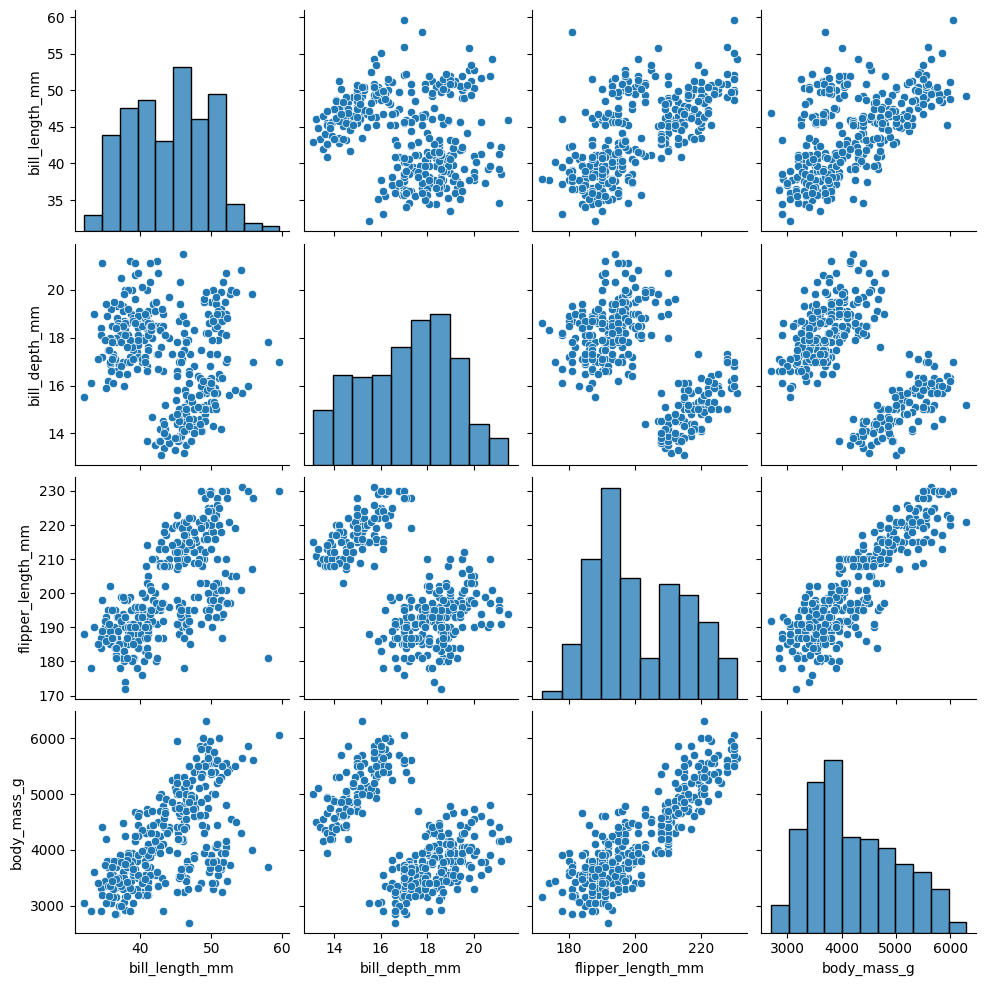

In [28]:
sns.pairplot(df)

In [24]:
torch.manual_seed(1)

class BirdNet(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        
        hidden = 256
        
        self.seq = nn.Sequential(
            nn.Linear(in_features, hidden),
            nn.ReLU(),
            nn.Linear(hidden, out_features)
        )
        
    def forward(self, x):
        x = F.normalize(x)
        return self.seq(x)
    
model = BirdNet(4, 3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
total_loss = []

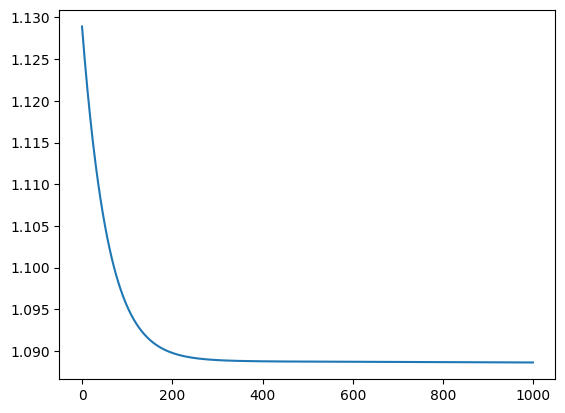

In [25]:
model.train()

for epoch in range(1000):
    optimizer.zero_grad()
    
    preds = model(X_train)
    loss = criterion(preds, y_train)
    
    loss.backward()
    optimizer.step()
    
    total_loss.append(loss.item())
    
plt.plot(total_loss)

In [5]:
sum(p.numel() for p in model.parameters())

131

In [26]:
model.eval()

with torch.no_grad():
    preds_test = model(X_test)
    preds_train = model(X_train)
    
test_acc = torch.sum(torch.argmax(preds_test, dim=1) == y_test) / len(y_test)
train_acc = torch.sum(torch.argmax(preds_train, dim=1) == y_train) / len(y_train)

test_acc, train_acc

(tensor(0.4000), tensor(0.4000))

In [23]:
preds_train

tensor([[-0.0887, -0.0892,  0.1952],
        [-0.0918, -0.0897,  0.1964],
        [-0.0902, -0.0896,  0.1960],
        [-0.0909, -0.0896,  0.1960],
        [-0.0925, -0.0900,  0.1972],
        [-0.0907, -0.0897,  0.1961],
        [-0.0867, -0.0889,  0.1941],
        [-0.0924, -0.0897,  0.1966],
        [-0.0857, -0.0887,  0.1936],
        [-0.0886, -0.0893,  0.1952]])